<a href="https://colab.research.google.com/github/AlexanderSlokov/aiClassPracticeAssignments/blob/main/FuzzyControllerEx1WaterLevelCtrl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=dd245a35001f7d20ee0f7acf742893e1296d6f81af2d14c798d301fda914ad8a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [4]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


In [28]:
#add control about the LEVEL OF WATER AND WATER DEFENITION form -1 to 1, TICK 0.1
level = ctrl.Antecedent(np.arange(-1.1,1.1,0.2),'level')
level_def = ctrl.Antecedent(np.arange(-1.1,1.1,0.2),'level_def')

In [19]:
#output is the VALVE'S FUNCTIONS form 0.0 to 1.0, TICK 0.1
valve = ctrl.Consequent(np.arange(0,1.1,0.1),'valve')

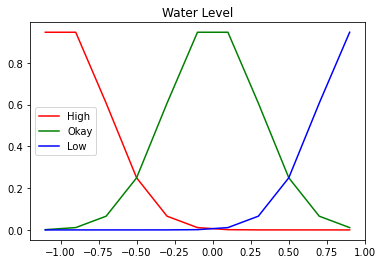

In [34]:
#create graph for WATER LEVEL 
level['high'] = fuzz.gaussmf(level.universe, -1, 0.3)
level['okay'] = fuzz.gaussmf(level.universe, 0, 0.3)
level['low'] = fuzz.gaussmf(level.universe, 1, 0.3)

# Plot the fuzzy sets for water level
fig, ax = plt.subplots()

ax.plot(level.universe, fuzz.gaussmf(level.universe, -1, 0.3), 'r', linewidth=1.5, label='High')
ax.plot(level.universe, fuzz.gaussmf(level.universe, 0, 0.3), 'g', linewidth=1.5, label='Okay')
ax.plot(level.universe, fuzz.gaussmf(level.universe, 1, 0.3), 'b', linewidth=1.5, label='Low')

ax.set_title('Water Level')
ax.legend()

# Display the plot
plt.show()

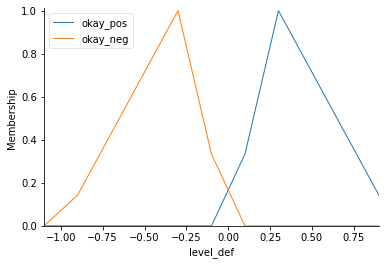

In [32]:
#create graphs for WATER DEFINITION
level_def['okay_pos'] = fuzz.trimf(level.universe,[0,0.3,1])
level_def['okay_neg'] = fuzz.trimf(level.universe,[-1,-0.3,0])

level_def.view()

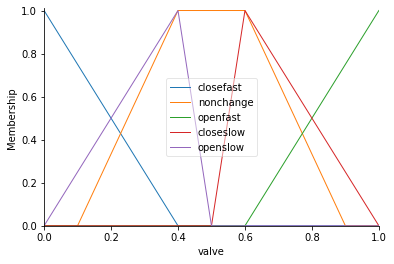

In [31]:
#create graph for VALVE_FUNCTION 
valve['closefast']=fuzz.trimf(valve.universe,[0,0,0.4])
valve['nonchange']=fuzz.trapmf(valve.universe,[0.1,0.4,0.6,0.9])
valve['openfast']=fuzz.trimf(valve.universe,[0.6,1,1])

valve['closeslow']=fuzz.trimf(valve.universe,[0.6,0.6,1])
valve['openslow']=fuzz.trimf(valve.universe,[0,0.4,0.4])

#view the graph
valve.view()

In [35]:
#set rules for controler
rule1=ctrl.Rule(level['okay'],valve['nonchange'])
rule2=ctrl.Rule(level['low'],valve['openfast'])
rule3=ctrl.Rule(level['high'],valve['closefast'])

rule4=ctrl.Rule(level['okay']&level_def['okay_pos'],valve['closeslow'])
rule5=ctrl.Rule(level['okay']&level_def['okay_neg'],valve['openslow'])


In [38]:
#begin training, how many rules much tell
operating_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
operating = ctrl.ControlSystemSimulation(operating_control)

In [54]:
#input for testing, two parameters take the same value.
operating.input['level'] = 0.52
operating.input['level_def'] = 0.52

0.5885419343064423


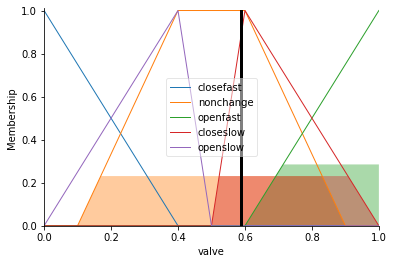

In [55]:
operating.compute()
print(operating.output['valve'])
valve.view(sim=operating)